<a href="https://www.kaggle.com/code/phamtrananhtuan/final?scriptVersionId=99018812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
# Gọi các thư viện cần thiết 
import numpy as np
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop # toi uu
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import keras
from keras.models import Sequential
from keras.layers import Dense # fully connected
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.callbacks import EarlyStopping # dung lai ngay lap tuc
from sklearn.preprocessing import scale # xu li du lieu
from sklearn.preprocessing import StandardScaler # xu li du lieu

In [2]:
# # Preprocessing
train = ImageDataGenerator(rescale=1/255)


In [3]:
# train_dataset = train.flow_from_directory("../input/datasetcarbike/",
#                                          target_size=(32,32),
#                                          batch_size =4,
#                                          class_mode='binary')
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory="../input/data-shoe/lan_cuoi8/train",
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory="../input/data-shoe/lan_cuoi8/train",
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1503 images belonging to 4 classes.
Found 373 images belonging to 4 classes.


In [4]:
import glob
adidas = glob.glob('../input/data-shoe/lan_cuoi8/train/adidas/*.*')
nike = glob.glob('../input/data-shoe/lan_cuoi8/train/nike/*.*')
converse = glob.glob('../input/data-shoe/lan_cuoi8/train/converse/*.*')
no_shoe = glob.glob('../input/data-shoe/lan_cuoi8/train/no-shoe/*.*')

data = []
labels = []
#224 300 512
for i in adidas:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in nike:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in no_shoe:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in converse:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(1)

    
data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1500, 150, 150, 3) (1500,) (376, 150, 150, 3) (376,)


In [6]:
train_dataset.class_indices

{'adidas': 0, 'converse': 1, 'nike': 2, 'no-shoe': 3}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

2022-06-22 06:41:17.095927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 06:41:17.290511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 06:41:17.291503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 06:41:17.292987: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0

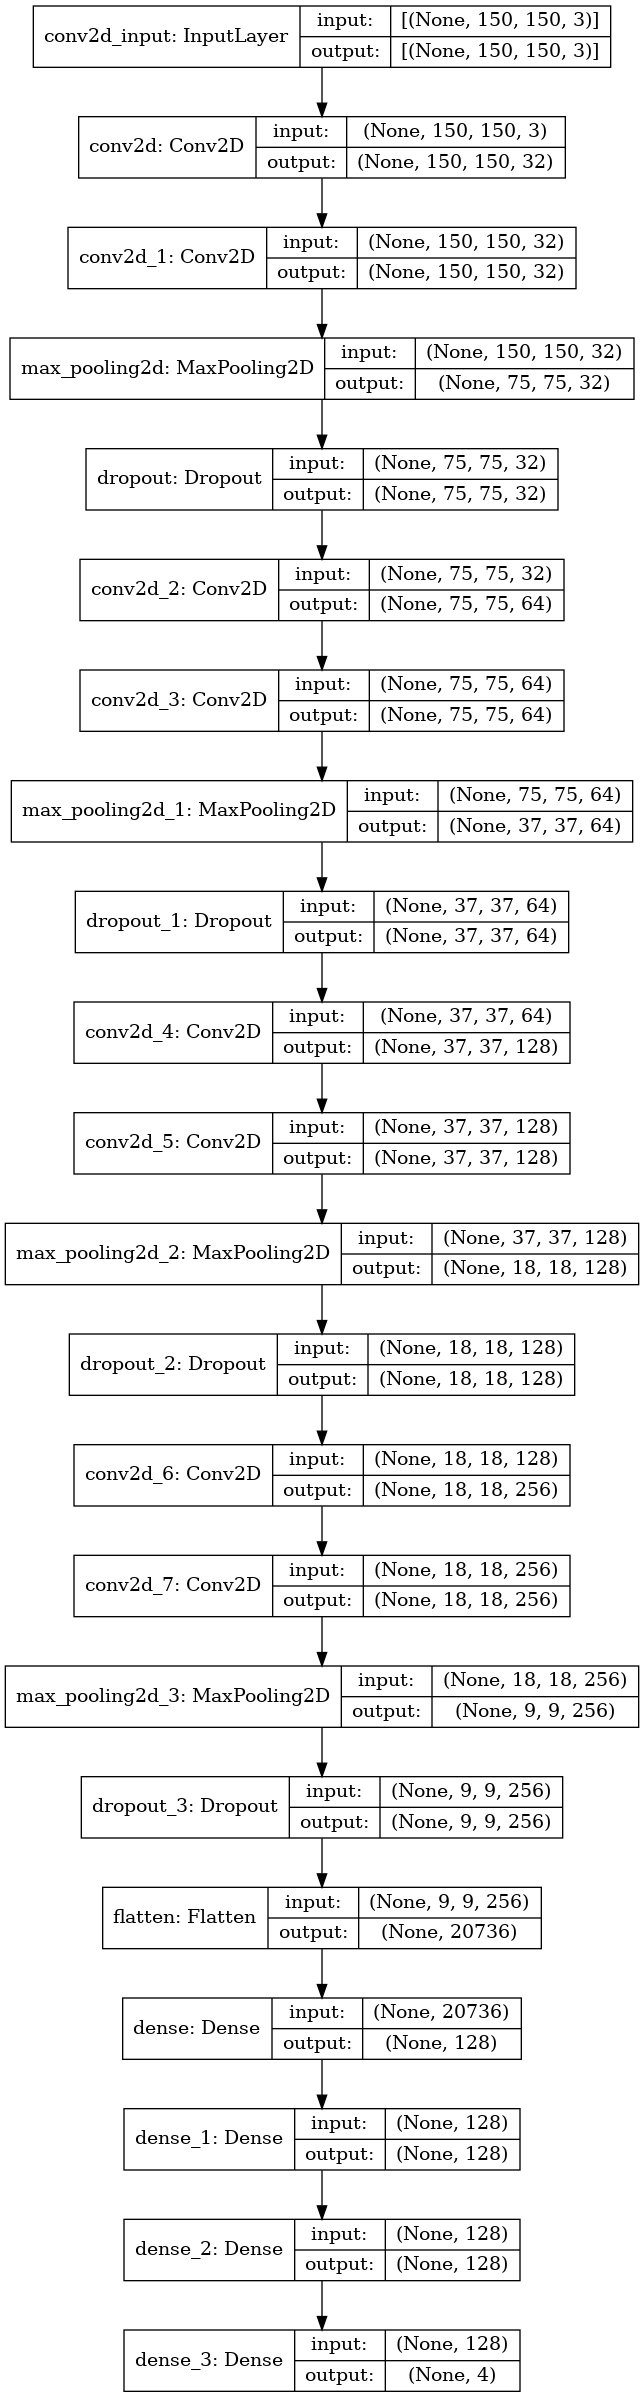

In [8]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# 64 lan tich chap
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# 128 lan tich chap
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# 256 lan tich chap
model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))

model.add(Dense(4))
model.summary()

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
# Train model
history=model.fit(train_dataset,batch_size=100,epochs=150,validation_data=validation_dataset)

2022-06-22 06:41:22.550570: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-06-22 06:41:26.115685: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


19/47 [===========>..................] - ETA: 14s - loss: 4069.2068 - accuracy: 0.3125

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 [==============================] - 37s 570ms/step - loss: 1646.2073 - accuracy: 0.3307 - val_loss: 0.2310 - val_accuracy: 0.2332
Epoch 2/150
47/47 [==============================] - 29s 611ms/step - loss: 0.1932 - accuracy: 0.3433 - val_loss: 0.2266 - val_accuracy: 0.3244
Epoch 3/150
47/47 [==============================] - 28s 589ms/step - loss: 0.1874 - accuracy: 0.3746 - val_loss: 0.2290 - val_accuracy: 0.2440
Epoch 4/150
47/47 [==============================] - 28s 602ms/step - loss: 0.1844 - accuracy: 0.3879 - val_loss: 0.2081 - val_accuracy: 0.2788
Epoch 5/150
47/47 [==============================] - 27s 579ms/step - loss: 0.1896 - accuracy: 0.3839 - val_loss: 0.1919 - val_accuracy: 0.4799
Epoch 6/150
47/47 [==============================] - 27s 579ms/step - loss: 0.1871 - accuracy: 0.3939 - val_loss: 0.1737 - val_accuracy: 0.5067
Epoch 7/150
47/47 [==============================] - 26s 562ms/step - loss: 0.1803 - accuracy: 0.4298 - val_loss: 0.1830 - val_accuracy: 0.3727
E

In [10]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(X_test,Y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  62.4652214050293
Độ chính xác kiểm tra là:  0.19680851697921753


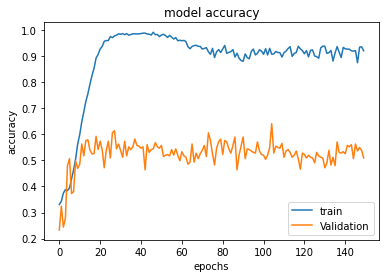

In [11]:
# Draw plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

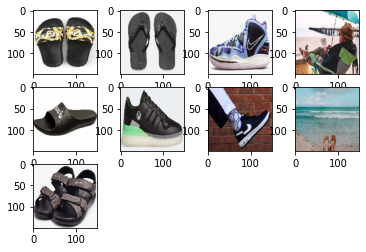

In [12]:
for i in range(10,19):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i])
plt.show()

In [13]:
# Save model
from tensorflow.keras.models import load_model
model.save('Final.h5')
model_ANN = load_model('Final.h5')

mang giày vô đi ku


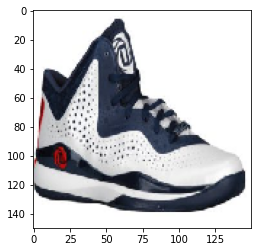

In [14]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/data-final10/lan_cuoi8/test/adidas/ADIDAS_55.png"

predict = ['adidas','nike','no_shoe', 'converse']
predict = np.array(predict)
img = load_img(filename,target_size=(150,150))
plt.imshow(img)

img = load_img(filename,target_size=(150,150))
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_ANN.predict(img),axis=-1)
predict[result]

if(result==0):
    print("adidas")
if(result==3):
    print("nike")
if(result==1):
    print("converse")
if(result==2):
    print("mang giày vô đi ku")